In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.DataFrame({'x' : [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                   'y' : [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
                  })

In [63]:
np.random.seed(200)
k = 3


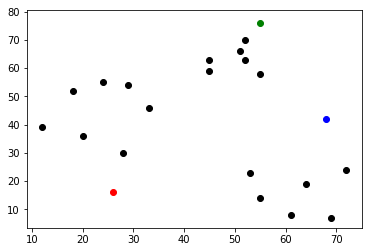

In [64]:
centroid = {}
for i in range(k):
    centroid[i + 1] = [np.random.randint(0, 80), np.random.randint(0, 80)]
centroid
plt.scatter(df['x'], df['y'], color = "black")
cmap = {1 : 'r', 2 : 'b', 3 : 'g'}
for i in range(k):
    plt.scatter(centroid[i + 1][0], centroid[i + 1][1], color = cmap[i + 1])

In [65]:
def assignment(df):
    for i in range(1,k + 1):
        df["distance from {}".format(i)] = np.sqrt((df['x'] - centroid[i][0]) ** 2 + (df['y'] - centroid[i][1]) ** 2)
    
    for i, row in df.iterrows():
        miv = df.at[i, "distance from 1"]
        mid = 1
        #print("%d %d ", (miv, mid))
        for j in range(2, k + 1):
            if df.at[i, "distance from {}".format(j)] < miv:
                miv = df.at[i, "distance from {}".format(j)]
                mid = j
        #print(mid)
        df.at[i, "closest"] = int(mid)
        df.at[i, "color"] = cmap[mid]
    return df
df = assignment(df)
df

,x,y,distance from 1,distance from 2,distance from 3,closest,color
0,12,39,26.925824,56.080300,56.727418,1.0,r
1,20,36,20.880613,48.373546,53.150729,1.0,r
2,28,30,14.142136,41.761226,53.338541,1.0,r
3,18,52,36.878178,50.990195,44.102154,1.0,r
4,29,54,38.118237,40.804412,34.058773,3.0,g
5,33,46,30.805844,35.227830,37.202150,1.0,r
6,24,55,39.051248,45.880279,37.443290,3.0,g
7,45,59,47.010637,28.600699,19.723083,3.0,g
8,45,63,50.695167,31.144823,16.401219,3.0,g
9,52,70,59.933296,32.249031,6.708204,3.0,g


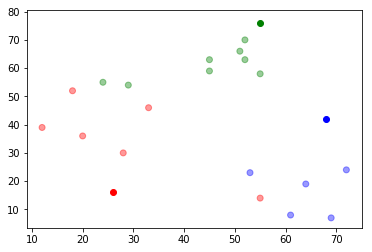

In [66]:
plt.scatter(df['x'], df['y'], color = df["color"], alpha = 0.4)
for i in range(1, k + 1):
    plt.scatter(centroid[i][0], centroid[i][1], color = cmap[i])

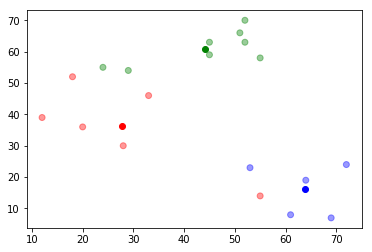

In [67]:
def update(centroid):
    for i in range(1, k + 1):
        centroid[i][0] = np.mean(df[df["closest"] == i]["x"])
        centroid[i][1] = np.mean(df[df["closest"] == i]["y"])
    return centroid
centroid = update(centroid)

plt.scatter(df['x'], df['y'], color = df["color"], alpha = 0.4)
for i in range(1, k + 1):
    plt.scatter(centroid[i][0], centroid[i][1], color = cmap[i])
        

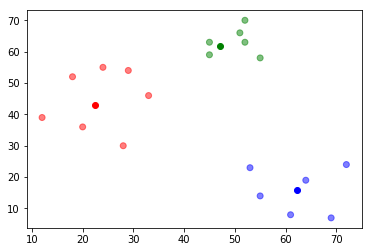

In [71]:
import copy
while True:
    old_centroid = copy.deepcopy(centroid)
    centroid = update(centroid)
    df = assignment(df)
    if old_centroid != centroid:
        break

plt.scatter(df['x'], df['y'], color = df["color"], alpha = 0.5)

for i in range (1, k + 1):
    plt.scatter(centroid[i][0], centroid[i][1], color = cmap[i])